## Infinite Overlapping Mixture Model with Binary clusters

In [1]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [49]:
#Generate synthetic data
K=6
N=500
D=8
N_iter=100
alpha_prior = 4
burning_period=25

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [50]:
Z

array([[ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.]])

In [51]:
X

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  1., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [52]:
theta

array([[  5.85086997e-01,   1.19327369e-01,   8.46571293e-04,
          7.14189183e-01,   3.77152976e-01,   6.20821074e-01,
          5.58541929e-01,   7.14525450e-01],
       [  2.49225325e-01,   5.39779839e-02,   2.08986260e-02,
          7.86957181e-01,   7.95056438e-01,   3.02273739e-01,
          8.05609819e-02,   4.92851767e-01],
       [  6.09108041e-02,   2.61384013e-02,   8.65447714e-01,
          7.01181542e-01,   1.68857681e-01,   9.00585740e-01,
          5.15376444e-01,   1.89305837e-01],
       [  3.81086997e-01,   4.93413961e-01,   3.22849902e-01,
          5.04716980e-01,   5.42059591e-01,   4.56640806e-02,
          7.58797190e-02,   6.80992513e-02],
       [  9.46465442e-01,   5.53593154e-02,   5.01218655e-01,
          5.37688371e-02,   4.10271533e-02,   6.04935832e-01,
          8.60022301e-01,   6.13657436e-03],
       [  1.59807732e-01,   8.49234219e-01,   5.27914979e-01,
          7.72730800e-02,   6.68227505e-01,   1.54339667e-01,
          6.99023325e-01,   3.9

#### IOMM algorithm

In [53]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 250,
                 burning_period=burning_period)

In [54]:
%%capture
Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)

In [36]:
Z_hat_mean

array([[ 0.        ,  0.99866667,  0.        ,  0.        ,  0.99866667,
         0.        ],
       [ 0.99866667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.99866667,  0.        ,  0.99866667,
         0.        ],
       ..., 
       [ 0.172     ,  0.15866667,  0.14666667,  0.13333333,  0.13866667,
         0.15466667],
       [ 0.14533333,  0.21466667,  0.10666667,  0.176     ,  0.15066667,
         0.176     ],
       [ 0.12      ,  0.19466667,  0.16133333,  0.16533333,  0.144     ,
         0.188     ]])

In [ ]:
Z_hat

In [37]:
Z

array([[ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.]])

In [38]:
Z-Z_hat

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [-1.,  1.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.]])

In [39]:
from matplotlib import pyplot as plt 
import numpy as np

In [40]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

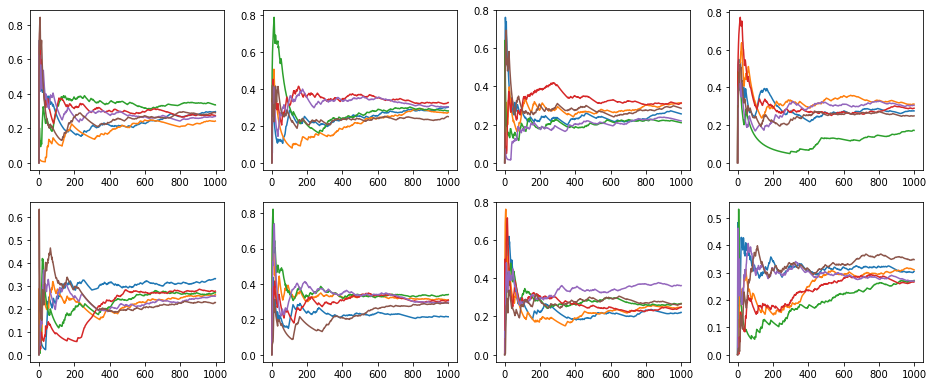

In [41]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(3,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

In [47]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
print(U_hat)
U=np.dot(Z,Z.T)
print(U)

[[ 2.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 2.  0.  1. ...,  1.  0.  1.]
 [ 0.  1.  0. ...,  0.  1.  0.]
 [ 1.  0.  2. ...,  1.  0.  1.]
 ..., 
 [ 1.  0.  1. ...,  3.  0.  1.]
 [ 0.  1.  0. ...,  0.  2.  0.]
 [ 1.  0.  1. ...,  1.  0.  2.]]


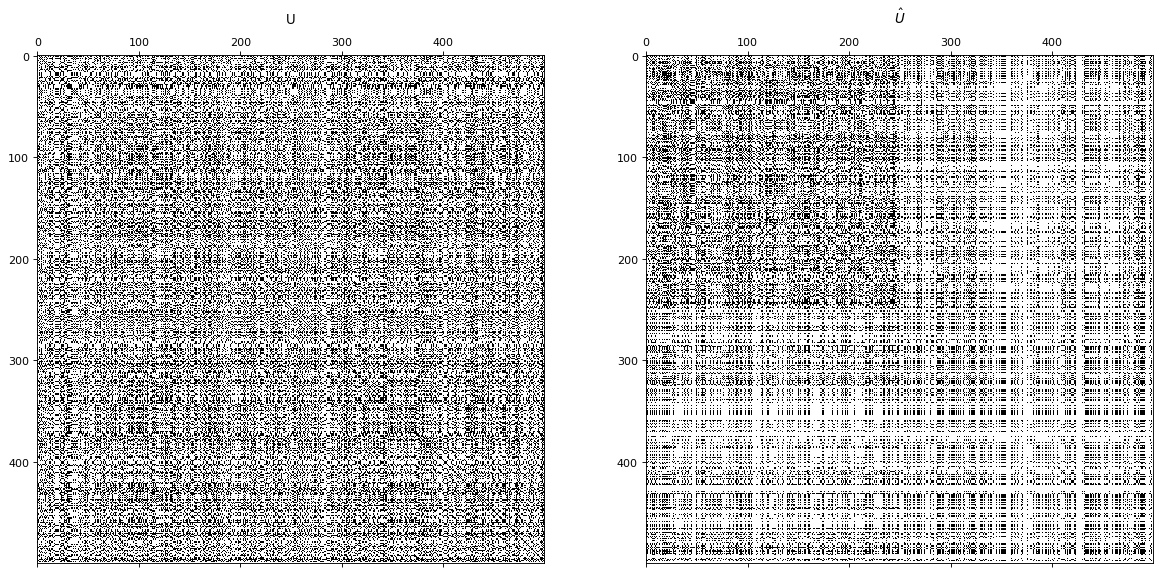

In [55]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [44]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff<0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<1])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<3])/(N*N))

% of pairs having same number of clusters: 0.0
% of pairs having at most 1 cluster difference: 0.734944
% of pairs having at most 2 clusters difference: 0.986444
% of pairs having at most 3 clusters difference: 0.999912
